In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('python_files/')
from Pde_solver import Solver
from Inference import Inference

In [2]:
## Initiate PDE solver class 
solv = Solver(n_save_frames=20, n_time_points=2000, model='gray-scott', n_grid=64)

In [3]:
## Set F & k parameters and solve
## spots: F=0.035, k=0.065
## maze-like: F=0.035, k=0.06

tmp = solv.solve(parameters=[0.035, 0.060], verbose=True)  # parameters = [F, k]

 11%|█▏        | 229/2000 [00:00<00:00, 2286.23it/s]

Solving gray-scott model in 2000 time steps.




100%|██████████| 2000/2000 [00:00<00:00, 2712.26it/s]


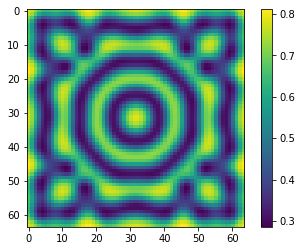

In [4]:
## Plot result
plt.imshow(solv.u_mat[:, :])
plt.colorbar()

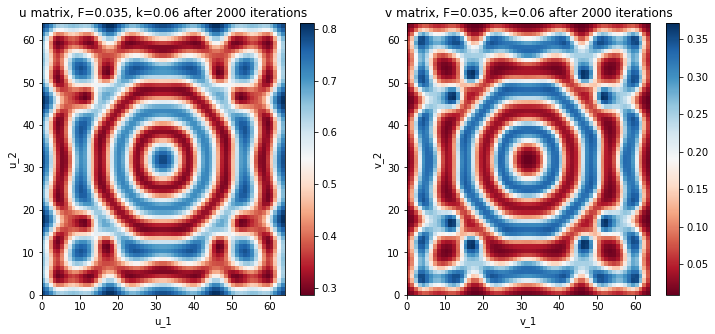

In [6]:
## Or use plotting function from class
solv.plot2d()

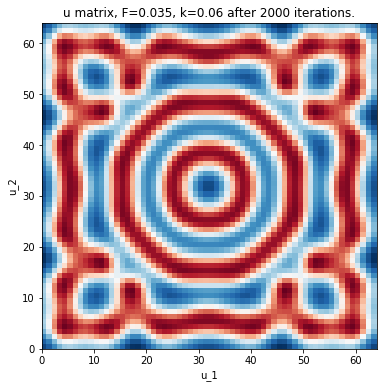

In [7]:
## Save animation to disk
plt.rcParams['figure.figsize'] = (6, 6)
solv.animation()

In [29]:
len(solv.save_times)
solv.save_times
solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y).shape

(20, 65536)

In [5]:
## Initiate inference class:
inference = Inference(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))
# problem = pints.MultiOutputProblem(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))

In [6]:
inference.optimise()

Minimising error measure
Using Seperable Natural Evolution Strategy (SNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      12296.21   0:06.7
1     12     12296.21   0:12.4
2     18     12296.21   0:16.8
3     24     12296.21   0:21.5
20    126    12296.21   1:47.6
40    246    12296.21   3:18.7
60    366    12296.21   4:51.7
80    486    12296.21   6:21.8
100   606    12296.21   7:55.2
120   726    12296.21   9:26.7
140   846    12296.21  10:54.2
160   966    12296.21  12:23.1

----------------------------------------
Unexpected termination.
Current best score: 12296.210907572162
Current best position:
 2.38206826724623108e-02
 4.21184742298961912e-01
----------------------------------------


KeyboardInterrupt: 